# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Ship_

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'79W', '255', '100', '997', '60S', 'GFC', '85Y', '05Z', '142', 'SHO', '336', '37U', '35Y', 'P-0', '69X', 'HEA', '63V', '314', 'O-0', '64X', 'BWF', '757', '05Y', '689', '98U', '95X', '30T', '883', '-07', '365', '01Y', 'GC-', '25X', 'TK-', '929', 'FL-', '090', '360', '036', '637', 'TR-', '56V', '154', '55V', 'SI-', '75Y', '109', 'FLB', '466', '957', '506', 'FI-', '01W', 'GLF', 'X-0', 'UI-', '043', '581', 'OC-', '428', 'TH-', '148', '193', 'ASA', '737', 'B-T', '85X', 'INF', '130', '31Z', '502', '649', '04Z', '182', '107', '35X', '742', '962', '27W', '443', '621', '63Z', '346', '85Z', '93Z', '10X', '461', '763', '170', 'ED-', '42V', '595', '79V', '753', '893', '801', 'BEB', 'HF-', '52W', '614', 'HUM', '06V', '12V', '772', 'IS-', '040', 'IL-', '968', '245', '30Y', '041', '651', '449', '38W', '463', '212', '550', '97W', '518', '705', '827', '84X', 'LE-', '660', 'LC-', '358', 'WTI', '52Y', '14Y', '57T', '28Z', '66Z', '600', '086', '778', '55U', '28S',

In [6]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [7]:
# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('UND'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

UND


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [8]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
UND-026-0008Z 49    UND-026-0008Z         320000  3.890424
UND-026-0012Z 191   UND-026-0012Z        2224000  3.164748
UND-026-0015Z 324   UND-026-0015Z         380000  3.186842
              362   UND-026-0015Z         408000  3.561399
UND-026-0016Y 381   UND-026-0016Y         320000  4.035946
UND-026-0020Z 514   UND-026-0020Z         360000  4.646387
UND-026-0022Z 558   UND-026-0022Z        1344000  3.518711
UND-026-0024Z 615   UND-026-0024Z         180000  3.049619
UND-026-0031Y 748   UND-026-0031Y        1080000  3.225644
              749   UND-026-0031Y        1040000  3.048499
UND-026-0036Z 942   UND-026-0036Z         180000  3.483565
UND-026-0037Z 983   UND-026-0037Z         296000  5.443305
UND-026-0049Y 1223  UND-026-0049Y         140000  3.952076
UND-026-0055Y 1302  UND-026-0055Y         234000  3.166945
UND

C:\Users\44777\AppData\Local\Temp\ipykernel_14304\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14304\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14304\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14304\1363007664.py:7: RuntimeWarning: Preci

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [10]:
df = custom_code_df

features = ['ProductNumber', 'order_month',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
            ]
target = 'OrderQuantity'

X = df[features]
y = df[target]

# one-hot encoding for categorical features
categorical_features = ['ProductNumber']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# preprocessor (keeps numerical features as is)
preprocessor = ColumnTransformer(
    transformers=[
        # one-hot encode categorical features
        ('cat', encoder, categorical_features)
    ], remainder='passthrough'
)

# transform the features
X_transformed = preprocessor.fit_transform(X)

In [11]:
customer_total = df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'


# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()

Train Shape: (2812, 260), Validation Shape: (704, 260)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [12]:
from model_utils import *

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024']
target = 'OrderQuantity'

# Prepare data
X = df[features]
y = df[target]

# # Define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('------------------------------')
print(y_val)
print('------------------------------')


# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Build the pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.005,
        max_iter=2000,
        early_stopping=True,
        random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Evaluate model using the imported function
train_metrics = evaluate_model(mlp_pipeline, X_train, y_train)
test_metrics = evaluate_model(mlp_pipeline, X_val, y_val)

# Print results
metrics = {'Neural Network': test_metrics}
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]

print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


------------------------------
2457      48000
70       100000
358       36000
325      160000
2208      90000
         ...   
1777      24000
1494      36000
1651     450000
227     1344000
555      176000
Name: OrderQuantity, Length: 704, dtype: int64
------------------------------
Mean Absolute Error (MAE): 28362.6753
Mean Squared Error (MSE): 6279126228.0976
Root Mean Squared Error (RMSE): 79240.9378
R-squared (R²): 0.9473
Mean Absolute Error (MAE): 38190.2034
Mean Squared Error (MSE): 7446849192.9204
Root Mean Squared Error (RMSE): 86295.1284
R-squared (R²): 0.9123

FINAL METRICS SUMMARY:
                         MAE           MSE          RMSE        R²
Neural Network  38190.203358  7.446849e+09  86295.128443  0.912293


In [14]:
test_metrics

{'MAE': 38190.20335821361,
 'MSE': 7446849192.920365,
 'RMSE': np.float64(86295.12844257412),
 'R²': 0.9122932987502737}

In [15]:
train_metrics

{'MAE': 28362.67530172226,
 'MSE': 6279126228.097568,
 'RMSE': np.float64(79240.93782949295),
 'R²': 0.9473217334251701}

In [16]:
mlp_pipeline.fit(total_X_train, total_y_train)

# Evaluate model using the imported function
total_train_metrics = evaluate_model(mlp_pipeline, total_X_train, total_y_train)
total_test_metrics = evaluate_model(mlp_pipeline, total_X_val, total_y_val)

Mean Absolute Error (MAE): 28362.6753
Mean Squared Error (MSE): 6279126228.0976
Root Mean Squared Error (RMSE): 79240.9378
R-squared (R²): 0.9473
Mean Absolute Error (MAE): 38190.2034
Mean Squared Error (MSE): 7446849192.9204
Root Mean Squared Error (RMSE): 86295.1284
R-squared (R²): 0.9123


In [17]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
df['DetailedOrderDate'] = pd.to_datetime(
    df['order_year'].astype(str) +
    df['order_week'].astype(str).str.zfill(2) +
    df['order_weekday'].astype(str),
    format='%Y%W%w'
)

In [18]:
# Get model predictions
y_train_pred = mlp_pipeline.predict(X_train)
y_val_pred = mlp_pipeline.predict(X_val)

# Use the 'total' for predictions for better idea on dashboards
total_y_train_pred = mlp_pipeline.predict(total_X_train)
total_y_val_pred = mlp_pipeline.predict(total_X_val)


In [19]:
# # statements to check the data of both y_val and y_val_pred
# print(y_val)
# print(y_val_pred)

In [20]:
y_val = pd.Series(y_val)

In [21]:
# Convert order year and month to datetime format
df['OrderDate'] = pd.to_datetime(df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
df = df.sort_values(by='OrderDate')

In [22]:
print(y_val)

print(y_val_pred)

2457      48000
70       100000
358       36000
325      160000
2208      90000
         ...   
1777      24000
1494      36000
1651     450000
227     1344000
555      176000
Name: OrderQuantity, Length: 704, dtype: int64
[5.27841118e+04 1.00264662e+05 1.43513981e+05 1.09042504e+05
 1.05486848e+05 7.28930434e+04 5.03991627e+04 2.33227164e+05
 6.25577778e+04 1.75380039e+05 8.49591796e+05 5.95775211e+04
 3.46267469e+04 1.61882699e+05 8.29952230e+03 7.20019954e+04
 8.81645536e+03 3.82980904e+04 4.57446833e+04 2.12979129e+06
 2.09515267e+05 8.04823918e+05 6.31068200e+04 2.44897666e+04
 2.72628586e+05 1.47692817e+04 2.66669480e+04 1.94255059e+04
 3.08140923e+04 1.36916333e+06 5.14297810e+04 6.24778138e+04
 4.95351273e+04 6.42102967e+04 3.16042564e+04 1.24902143e+04
 4.35365646e+04 9.84401399e+05 3.15812271e+04 2.02001327e+04
 7.24562246e+05 8.74808052e+04 4.49022375e+04 9.48660411e+04
 1.28296491e+05 8.78768231e+04 9.59546651e+04 4.85305106e+04
 6.71507491e+04 1.74031583e+04 3.44268845e+05

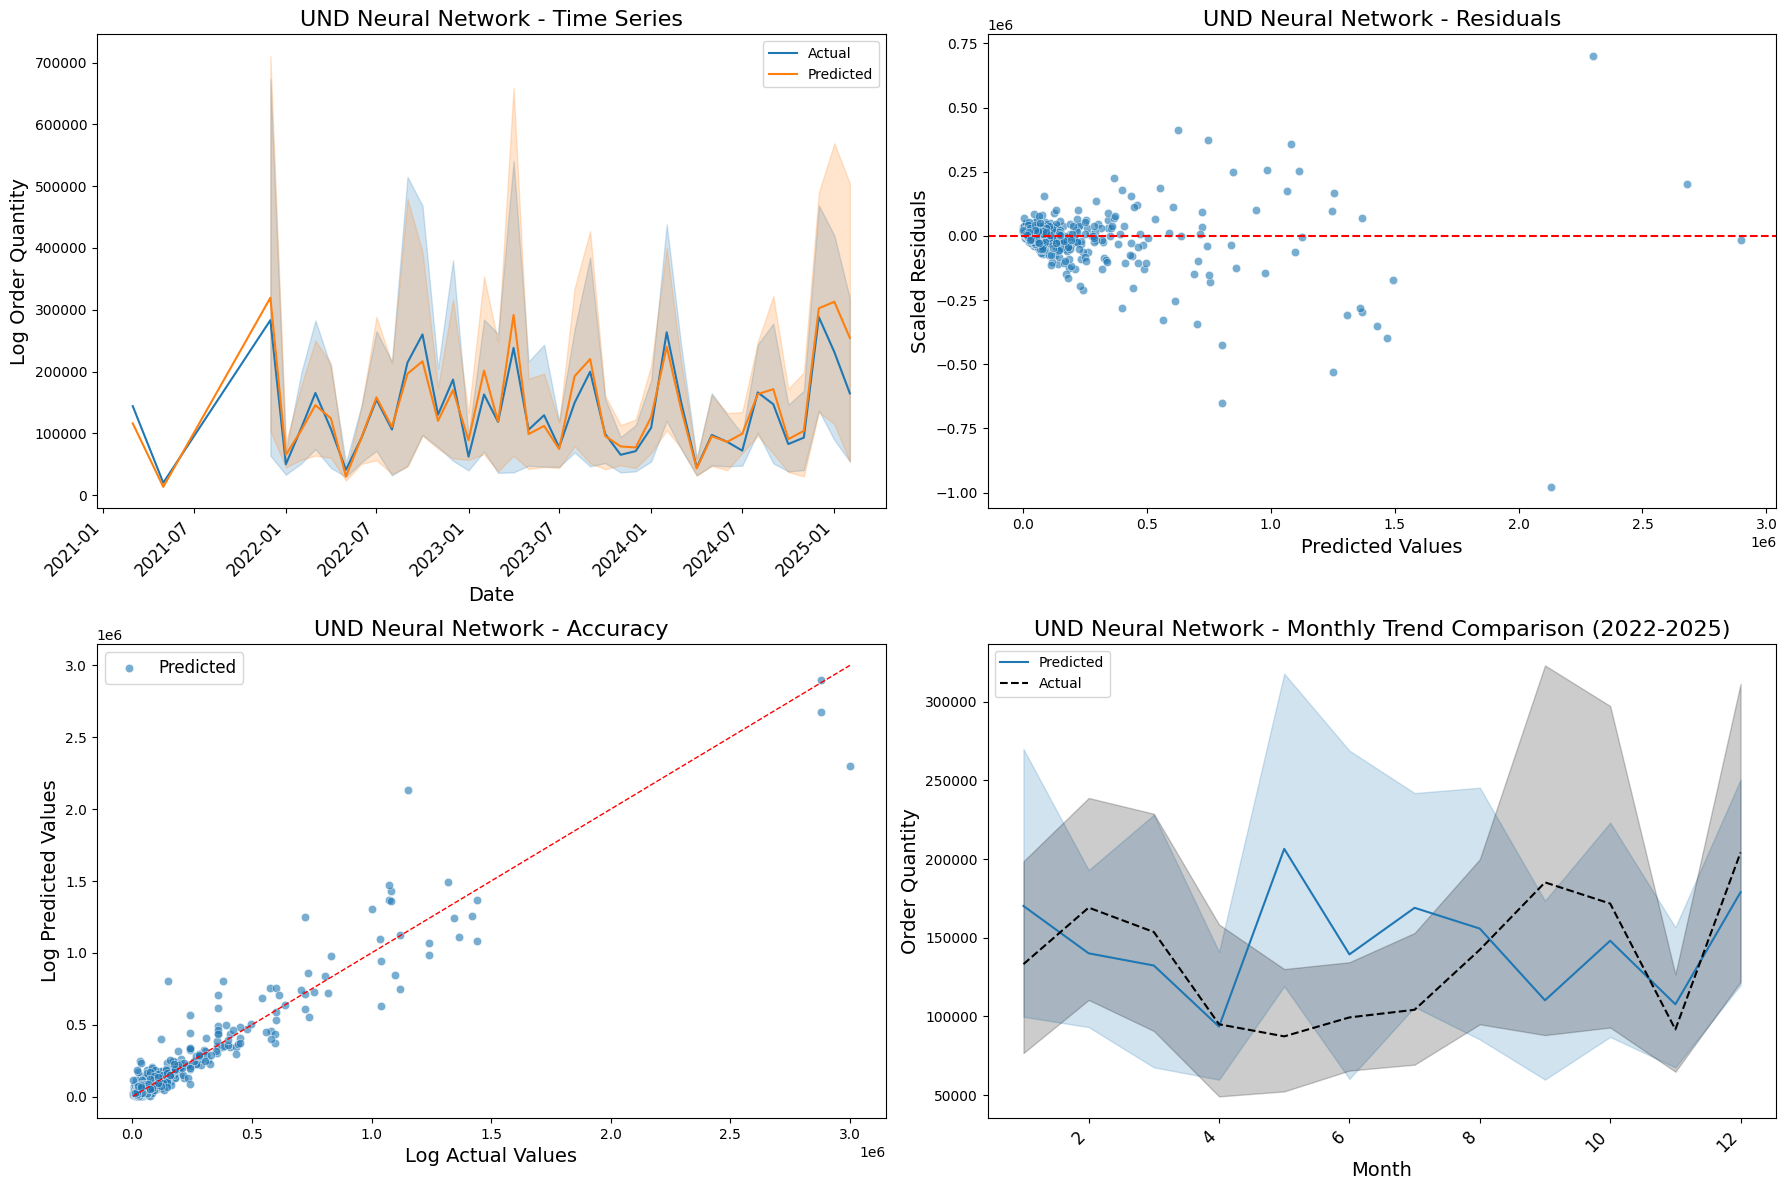

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create subplots (2 rows, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Time Series Comparison
sns.lineplot(x=df.loc[y_val.index, 'OrderDate'], y=y_val, label='Actual', ax=axes[0, 0])
sns.lineplot(x=df.loc[y_val.index, 'OrderDate'], y=y_val_pred, label='Predicted', ax=axes[0, 0])
axes[0, 0].set_title(f'{custom_ref} Neural Network - Time Series', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=14)  
axes[0, 0].set_ylabel('Order Quantity', fontsize=14)

# Residual Plot
residuals = y_val - y_val_pred
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, ax=axes[0, 1])
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title(f'{custom_ref} Neural Network - Residuals', fontsize=16)  
axes[0, 1].set_xlabel('Predicted Values', fontsize=14)  
axes[0, 1].set_ylabel('Scaled Residuals', fontsize=14)

# Actual vs Predicted Scatter Plot
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, ax=axes[1, 0], label='Predicted')
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)  # Reference line
axes[1, 0].set_title(f'{custom_ref} Neural Network - Accuracy', fontsize=16)
axes[1, 0].set_xlabel('Actual Values', fontsize=14)
axes[1, 0].set_ylabel('Predicted Values', fontsize=14)  
axes[1, 0].legend(fontsize=12)

# Monthly Trend Comparison
monthly_data = df[['order_month']].loc[df.index.intersection(X_val.index)].copy()
monthly_data['Actual'] = y_val
monthly_data['Predicted'] = y_val_pred

sns.lineplot(x='order_month', y='Predicted', data=monthly_data, label='Predicted', ax=axes[1, 1])
sns.lineplot(x='order_month', y='Actual', data=monthly_data, label='Actual', ax=axes[1, 1], color='black', linestyle='--')
axes[1, 1].set_title(f'{custom_ref} Neural Network - Monthly Trend Comparison (2022-2025)', fontsize=16)  
axes[1, 1].set_xlabel('Month', fontsize=14)
axes[1, 1].set_ylabel('Order Quantity', fontsize=14)

# Adjust x-tick labels after all plots are drawn
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


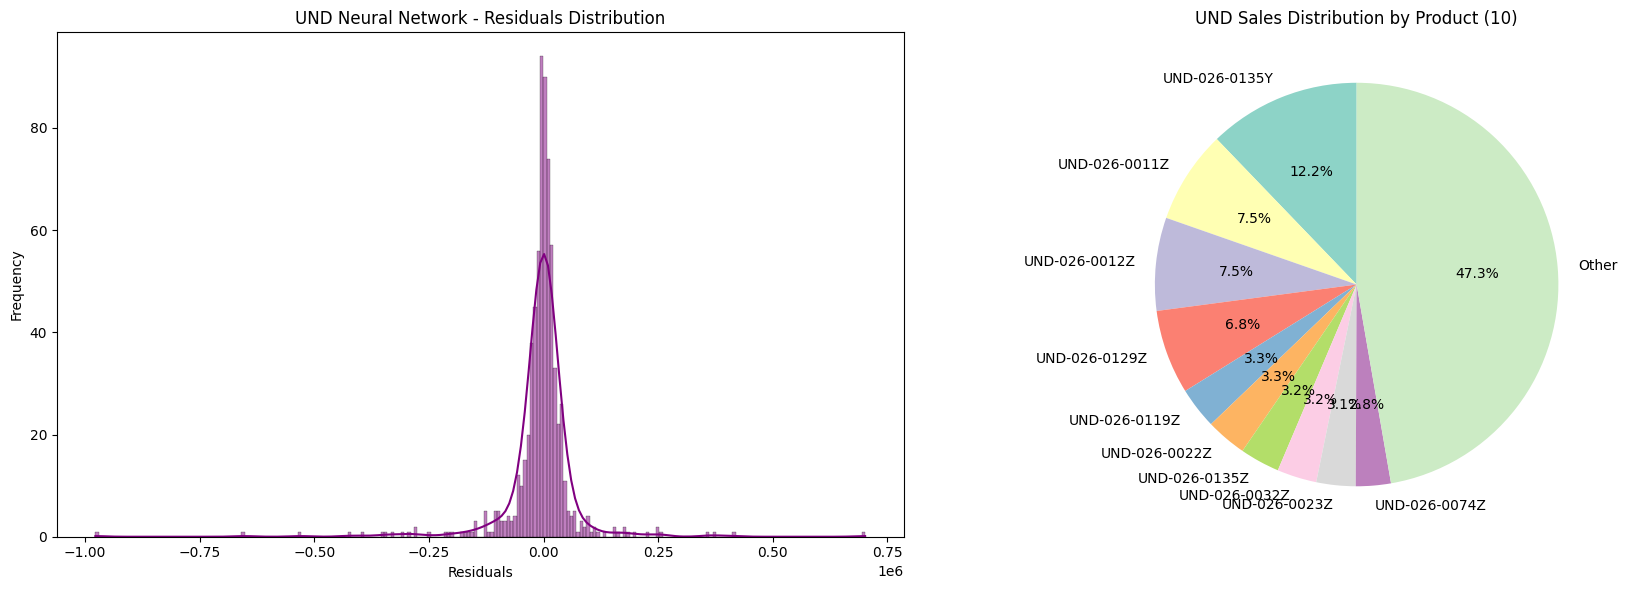

In [24]:
# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', ax=axes[0])
axes[0].set_title(f'{custom_ref} Neural Network - Residuals Distribution', fontsize=12)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Pie Chart of Product Order Quantity (Top {number} + Other)
product_sales = df.groupby('ProductNumber')['OrderQuantity'].sum()  # Group by product and sum order quantities

# Get the top 20 products by sales
top_products = product_sales.nlargest(10)

# Group the remaining products as 'Other'
other_sales = product_sales.drop(top_products.index).sum()
top_products['Other'] = other_sales

# Plot the pie chart
top_products.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_products)))
axes[1].set_title(f'{custom_ref} Sales Distribution by Product ({len(top_products) - 1})', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()

In [25]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,UND-026-0002Y,2022,1,4,2,0,194.0,30000,40000.00000,40000.00000,...,37333.333333,37000.000000,37000.000000,37000.000000,30000,0,0,-100.0,NaN,0
1,UND-026-0002Y,2022,3,12,1,0,194.0,40000,42000.00000,42000.00000,...,39333.333333,39333.333333,39333.333333,39333.333333,40000,0,0,-100.0,NaN,0
2,UND-026-0002Y,2022,6,23,4,0,194.0,42000,36000.00000,36000.00000,...,39000.000000,39000.000000,39000.000000,39000.000000,42000,0,0,-100.0,NaN,0
3,UND-026-0002Y,2024,7,28,2,0,194.0,36000,110031.53337,110031.53337,...,36000.000000,36000.000000,36000.000000,36000.000000,0,0,36000,NaN,inf,0
4,UND-026-0003Y,2022,3,12,1,0,194.0,10000,10000.00000,10000.00000,...,11333.333333,12666.666667,12666.666667,12666.666667,10000,0,0,-100.0,NaN,0


In [26]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [27]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2494,UND-026-0107Z,2021,3,9,0,0,194.0,36000,168000.0,168000.0,...,193000.000000,159000.000000,138000.000000,0,0,0,NaN,NaN,18000,2021-03-01
2644,UND-026-0114Z,2021,3,9,2,0,194.0,36000,40000.0,40000.0,...,35333.333333,26000.000000,24470.588235,0,0,0,NaN,NaN,0,2021-03-01
1849,UND-026-0086Z,2021,3,9,0,0,194.0,144000,72000.0,72000.0,...,132000.000000,99000.000000,132666.666667,0,0,0,NaN,NaN,144000,2021-03-01
3070,UND-026-0151Z,2021,5,20,2,0,194.0,180000,18000.0,18000.0,...,72000.000000,45818.181818,45818.181818,0,0,0,NaN,NaN,0,2021-05-01
2789,UND-026-0124Z,2021,5,20,4,0,194.0,28000,28000.0,28000.0,...,29750.000000,29750.000000,29750.000000,0,0,0,NaN,NaN,0,2021-05-01


In [28]:
# total_y_val.type

In [29]:
# total_y_val.type

In [30]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

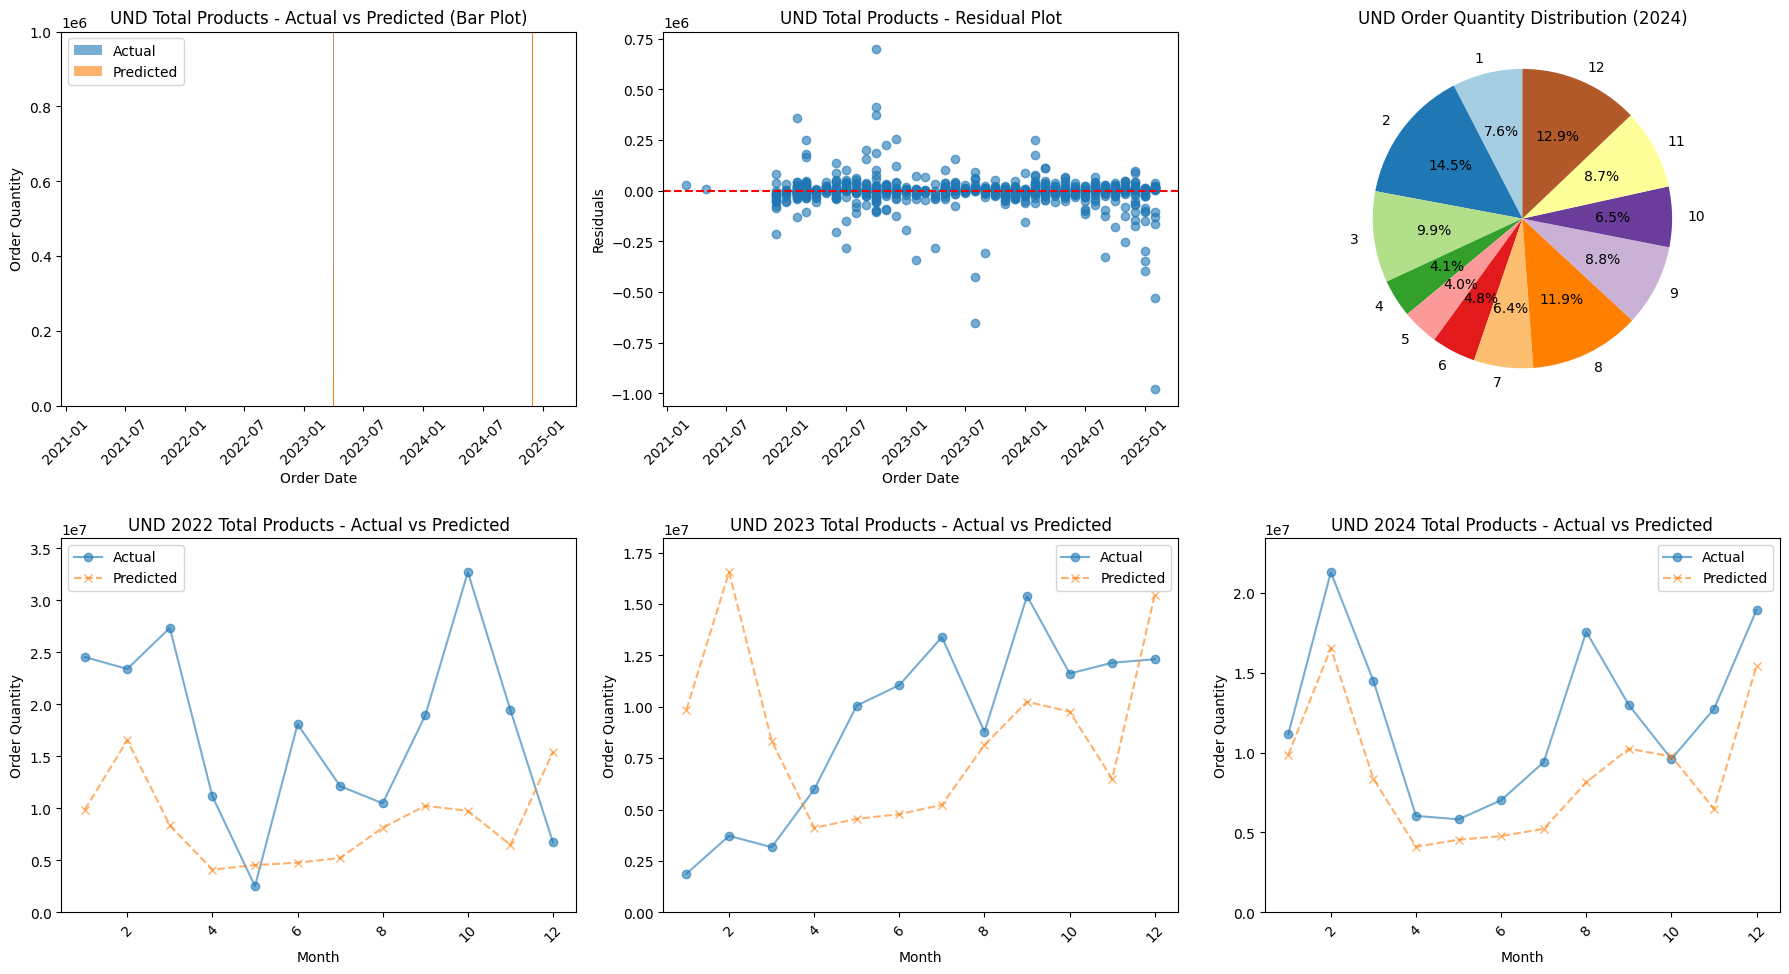

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suppose X_val is a DataFrame, y_val is a NumPy array
# y_val_pred is also a NumPy array of predictions from your NN

# y_val_series = pd.Series(y_val, index=X_val.index)
# y_val_pred_series = pd.Series(total_y_val_pred, index=X_val.index)

# 2) Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# 3) Bar plot: Actual vs. Predicted
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val, 
    label='Actual', 
    alpha=0.6
)
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val_pred, 
    label='Predicted', 
    alpha=0.6
)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 1_000_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 4) Residual Plot
residuals = total_y_val - total_y_val_pred
axes[0, 1].scatter(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    residuals, 
    alpha=0.6
)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# 5) Pie Chart: Order Quantity Distribution (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024] \
    .groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(
    order_2024,
    labels=order_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# 6) Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]
    if yearly_df.empty:
        continue

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_val_pred, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot
    axes[1, i].plot(
        monthly_actual.index,
        monthly_actual,
        label='Actual',
        alpha=0.6,
        marker='o',
        linestyle='-'
    )
    axes[1, i].plot(
        monthly_predicted.index,
        monthly_predicted,
        label='Predicted',
        alpha=0.6,
        marker='x',
        linestyle='--'
    )
    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
